In [4]:
pip install umap.umap_

ERROR: Invalid requirement: 'umap.umap_'
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.preprocessing import StandardScaler

# the dimensoinal reduction methods
from sklearn.manifold import TSNE
#import umap.umap_ as umap
from sklearn.decomposition import PCA
# The cluster methods 
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN

import seaborn as sns
sns.set_theme()

In [3]:
#df = pd.read_csv("n0_wpics_metadata19_hmineq0.0_tmin20050000_mean_grid_20.csv") 
df = pd.read_csv(r"C:\Users\beego\Desktop\Visualcode_Courses\STEMACADEMY\Gletsjer\Gletscher data\data\metadata19_hmineq0.0_tmin20050000_mean_grid_20.csv") 
df = df.dropna()
# Drop the specified feature
df = df.drop(columns=['RGIId'])

# Visualize with t-sne

In [4]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df)
tsne.kl_divergence_

KeyboardInterrupt: 

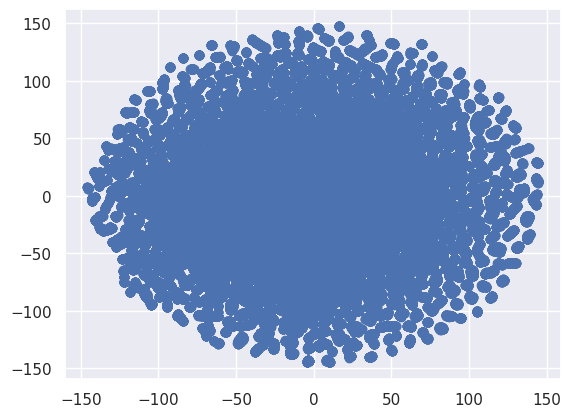

In [15]:
plt.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1])

In [16]:
algorithm = (KMeans(n_clusters = 9 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(df)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

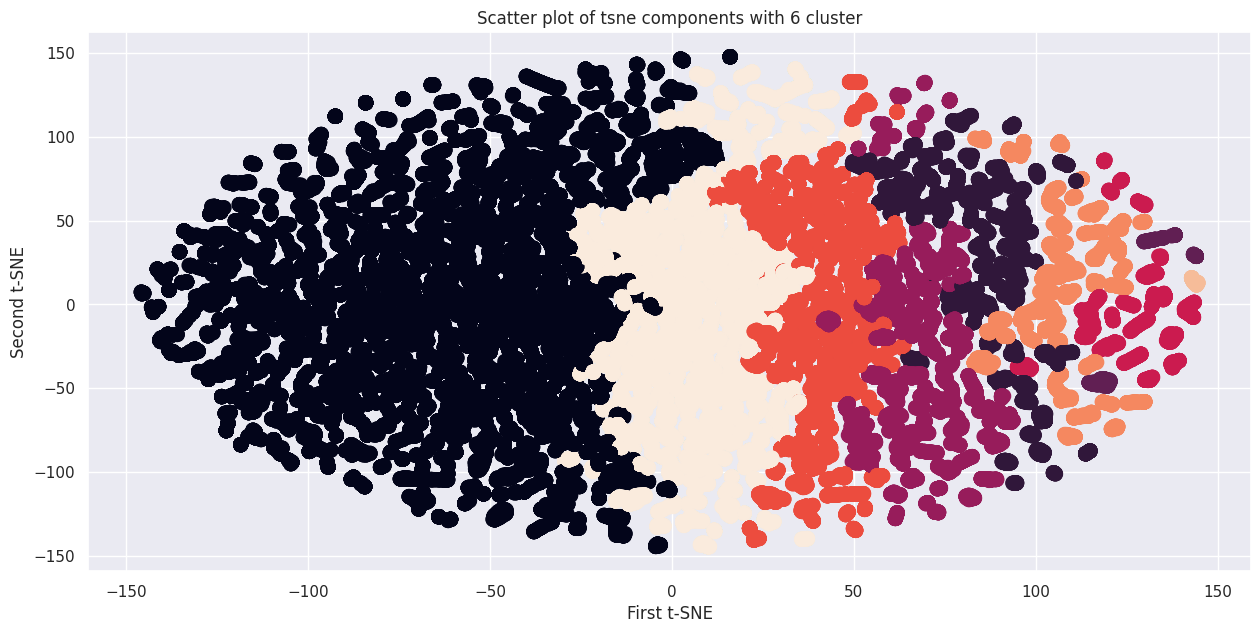

In [17]:
plt.figure(1, figsize=(15, 7))
plt.clf()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels1, s=100)
#plt.scatter(centroids1[:, 0], centroids1[:, 1], s=300, c='red', alpha=0.5)
plt.xlabel('First t-SNE')
plt.ylabel('Second t-SNE')
plt.title('Scatter plot of tsne components with 6 cluster')
plt.show()

***

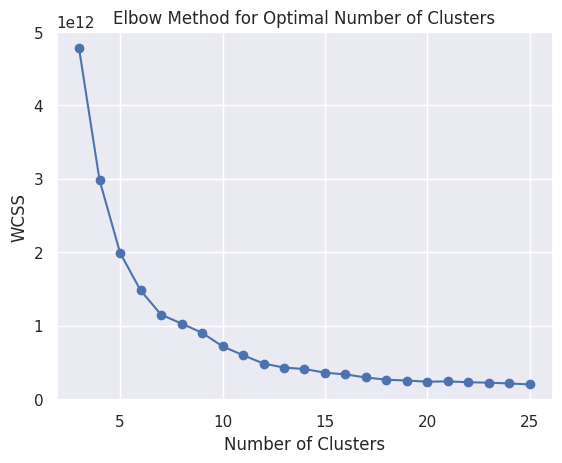

In [18]:
# Initialize an empty list to store the WCSS values
wcss_values = []

# Define the range of possible values for the number of clusters
cluster_range = range(3, 26)

# Iterate over the range of possible values for the number of clusters
for num_clusters in cluster_range:
    # Apply KMeans clustering with the specified number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df)
    
    # Compute the within-cluster sum of squares (WCSS)
    wcss = kmeans.inertia_
    
    # Append the WCSS value to the list
    wcss_values.append(wcss)

# Plot the WCSS values as a function of the number of clusters
plt.plot(cluster_range, wcss_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [19]:
# Different clustering methods
def minikm(number_cluster, X):
    mbk = MiniBatchKMeans(n_clusters=number_cluster, random_state=42, batch_size=1000) 
    clusters = mbk.fit_predict(X)
    return clusters

def kmean(number_cluster, X):
    algorithm = (KMeans(n_clusters = number_cluster ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    clusters = algorithm.fit(X)
    return

def dbscan(X):
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    clusters = dbscan.fit_predict(X)
    return clusters

In [20]:
# Different dimensinal reduction
def tsne(X):
    tsne = TSNE(n_components=2, random_state=42, n_iter=300)
    X_tsne = tsne.fit_transform(X)
    return X_tsne

def umap_model(X):
    umap_model_list = umap.UMAP(n_components=2, random_state=42)
    X_umap = umap_model_list.fit_transform(X)
    return X_umap


# Different dimensionality reduction methods together with different clustering methods

In [28]:
# Step 1: Preprocess the data
# Convert all column names to strings
df.columns = df.columns.astype(str)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
n_clusters = 9  # Set the number of clusters

In [29]:
# Step 2: Clustering 
miniclusters = minikm(n_clusters, X_scaled)      # with MiniBatchKMeans
kmclusters = kmean(n_clusters, X_scaled)         # Kmeans
dbcluster = dbscan(X_scaled)

In [24]:
# Step 4: Reduce dimensions for visualization using t-SNE
X_t = tsne(X_scaled)
#X_u = umap_model(X_scaled)

In [30]:
def visualize(clusters, X_dim):
    # Step 3: Add cluster labels to the DataFrame
    df['Cluster'] = clusters

    # Step 5: Plot the visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(X_dim[:, 0], X_dim[:, 1], c=clusters, cmap='viridis', s=2)
    plt.title('Visualization of Clusters')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

In [ ]:
visualize(miniclusters, X_u)

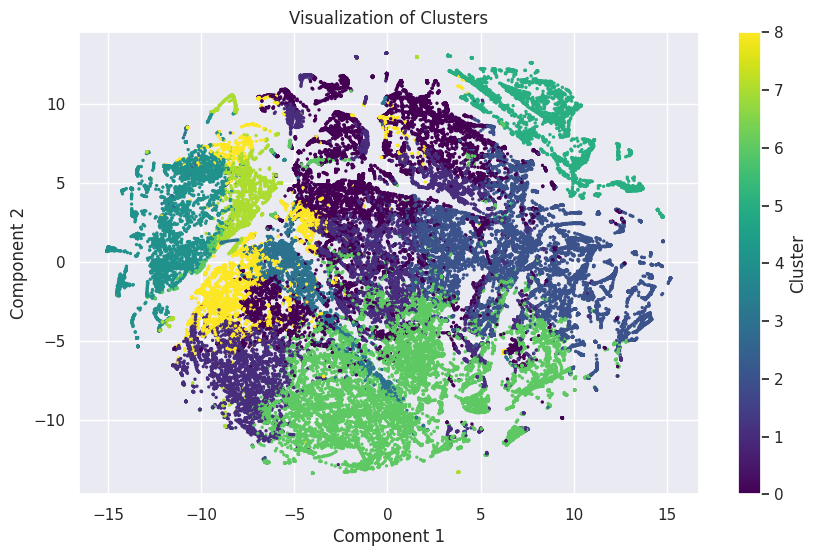

In [31]:
visualize(miniclusters, X_t)